In [1]:
import numpy as np
import pydicom
from skimage.io import imshow

This notebook is a simple check to see whether the sample data provided contains any information about the view of the data.

In [34]:
sample_path = "../sample_data/1.OUT/0000230/4000238/T.5.0000230.4000238[11].dcm"
dcm = pydicom.dcmread(sample_path)
base_tag = dcm[0x0018, 0x6011][0]
x1, x2, y1, y2 = base_tag.RegionLocationMinX0, base_tag.RegionLocationMaxX1, base_tag.RegionLocationMinY0, base_tag.RegionLocationMaxY1

You can get the appropriate crop from the above tags from the `dicom` header.
However, this still leaves some labels on the bottom, etc.

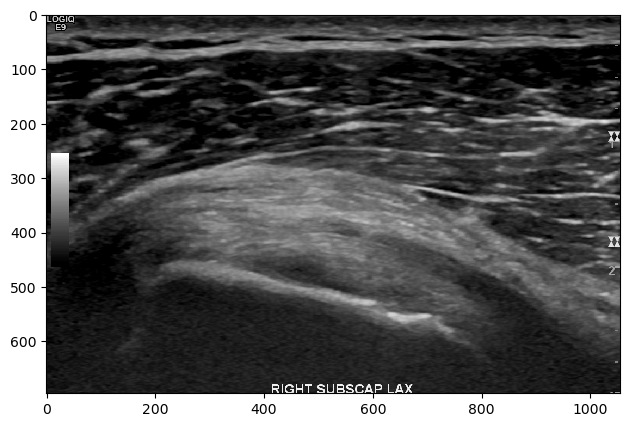

In [35]:
img = dcm.pixel_array
imshow(img[y1:y2, x1:x2])

Other files don't have this problem of having excess items on the edges and are already pre-cropped.
What do these images have as `dicom` values for this header then?

In [41]:
sample_path = "/home/khans24/hfhs_cnn/sample_data/1.OUT/0000470/4000498/T.3.0000470.4000498[48].dcm"
dcm = pydicom.dcmread(sample_path)
base_tag = dcm[0x0018, 0x6011][0]
x1, x2, y1, y2 = base_tag.RegionLocationMinX0, base_tag.RegionLocationMaxX1, base_tag.RegionLocationMinY0, base_tag.RegionLocationMaxY1

In [47]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.213455487443242114184893129266768568080
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.38'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'GENERAL']
(0008, 0012) Instance Creation Date              DA: '20190726'
(0008, 0013) Instance Creation Time              TM: '081554'
(0008, 0016) SOP Class UID                       UI: Ultrasound Image Storage
(0008, 

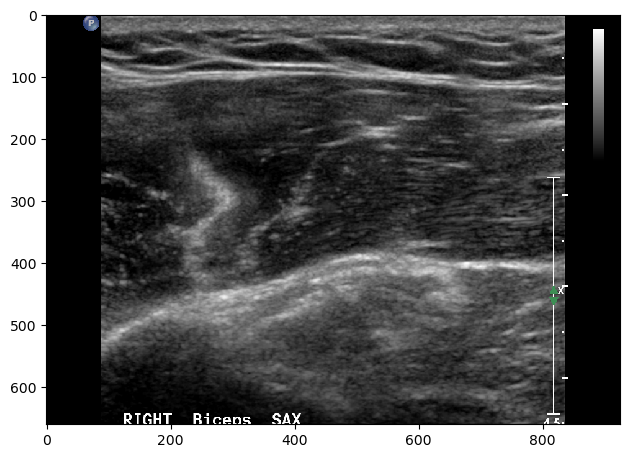

In [49]:
img = dcm.pixel_array
imshow(img[y1:y2, x1:x2])

Rather than worrying about doing the crop ourselves, it will just be easier to resort to using the cropping rules that the MSU data science students arrived at.